<a href="https://colab.research.google.com/github/tawan-chaidee/Image_sternography/blob/main/Image_sternography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from PIL import Image
from google.colab import files
from google.colab.patches import cv2_imshow

Tool to Encrypt and Decrypt message before using sternography (AES-128)

In [2]:
# AES-128
from cryptography.fernet import Fernet

def AES_encrypt(message):
  # Generate a random key
  key = Fernet.generate_key()
  # Turn string to bit
  encode_message = message.encode()

  # Encrypt the message
  cipher = Fernet(key)
  encrypted_data = cipher.encrypt(encode_message)

  return encrypted_data, key

def AES_decrypt(encrypted_data, key):
  cipher = Fernet(key)

  # Decrypt the data
  decrypted_data = cipher.decrypt(encrypted_data)

  return decrypted_data

#Encoding

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def encode_message(image, message):

    message = string_to_bits(message)
    data = np.array(image)
    message_bits = np.array([int(bit) for bit in message])

    # Calculate the number of bits needed to encode the message, including message length
    total_bits_needed = len(data) * len(data[0]) * 3

    # Check if the message fits within the image without repetitions
    if len(message_bits) + 16 > total_bits_needed:  # Add 16 bits for message length
        raise ValueError("Message is too long to be encoded without repetitions")

    # Convert the length of the message to binary (using 16 bits)
    message_length_bits = format(len(message), '016b')

    # Modify the least significant bit of each color channel pixel to encode the message length
    for i in range(16):  # Iterate over the 16 bits representing the message length
        data[0, i, 0] = (data[0, i, 0] & 0xFE) | int(message_length_bits[i])

    # Modify the least significant bit of each color channel pixel to encode the message
    for i in range(16, len(data)):
        for j in range(len(data[0])):
            for k in range(3):  # Iterate over RGB channels
                if len(message_bits) > 0:
                    data[i, j, k] = (data[i, j, k] & 0xFE) | message_bits[0]
                    message_bits = message_bits[1:]

    return Image.fromarray(data)


def display_images(original_img, modified_img):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(modified_img)
    axes[1].set_title('Modified Image with Hidden Message')
    axes[1].axis('off')
    plt.show()

def save_image(image, filename):
    image.save(filename)

def string_to_bits(message):
    # Convert each character to its binary representation
    # Using 8 bits for each character
    return ''.join(format(ord(char), '08b') for char in message)





# Decoding Image

In [4]:
import numpy as np
from PIL import Image

def decode_message(image):
    data = np.array(image)
    message_length_bits = ""

    # Extract the length of the message from the first 16 pixels
    for i in range(16):  # Iterate over the 16 bits representing the message length
        bit = data[0, i, 0] & 1  # Extract the least significant bit
        message_length_bits += str(bit)

    # Convert the binary string to integer to get the length of the message
    message_length = int(message_length_bits, 2)

    message_bits = []

    # Extract the message bits from the remaining pixels
    pixel_counter = 0
    for i in range(16, len(data)):
        for j in range(len(data[0])):
            for k in range(3):  # Iterate over RGB channels
                if pixel_counter < message_length:
                    # Extract the least significant bit
                    bit = data[i, j, k] & 1
                    message_bits.append(bit)
                    pixel_counter += 1
                else:
                    # All message bits have been extracted, exit the loop
                    break
            else:
                continue
            break
        else:
            continue
        break

    # Convert the extracted bits to a string
    message = ''.join([str(bit) for bit in message_bits])

    return message

def bits_to_string(bits):
    # Split the binary string into 8-bit chunks
    chunks = [bits[i:i+8] for i in range(0, len(bits), 8)]

    # Convert each chunk into its corresponding ASCII character
    return ''.join(chr(int(chunk, 2)) for chunk in chunks)


#Test The Image Sternography

Saving sus-cat.png to sus-cat.png


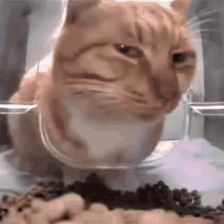

In [5]:
# Upload the image file
uploaded = files.upload()
embed_img = next(iter(uploaded))
im = Image.open(embed_img)
display(im)

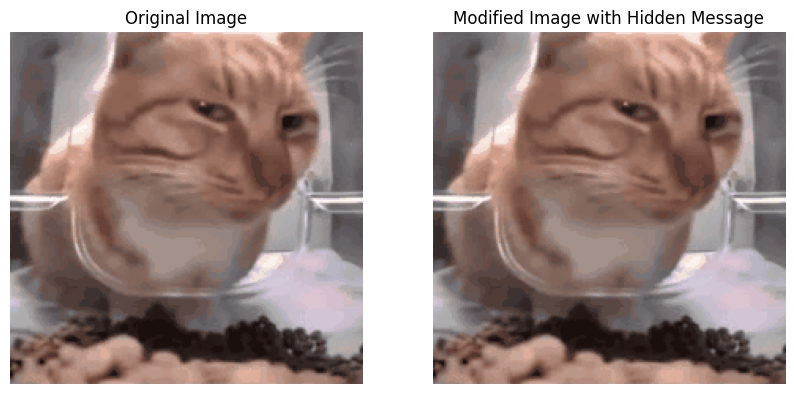

b"\nThe Fiery Spirit: Ginger cats are said to inherit a fiery spirit along with their vibrant fur. Just like the flames of a crackling fire, these felines possess an intense energy and a zest for life. They're often the life of the party, always ready to pounce into action and explore the world around them with unbridled enthusiasm.\nBold and Fearless: Ginger cats are known for their bravery and fearlessness. They approach new experiences with gusto, never hesitating to leap into the unknown. Whether it's climbing to the highest perch or confronting a pesky neighborhood dog, these cats fearlessly tackle challenges head-on, earning them a reputation as the daredevils of the feline world.\nSpirited Independence: Ginger cats have an independent streak as fiery as their fur. While they may enjoy the company of their humans, they also value their autonomy and refuse to be tied down by anyone or anything. They'll saunter off on solo adventures without a second thought, confidently navigating

In [6]:

# Define the message to be hidden
message = '''
The Fiery Spirit: Ginger cats are said to inherit a fiery spirit along with their vibrant fur. Just like the flames of a crackling fire, these felines possess an intense energy and a zest for life. They're often the life of the party, always ready to pounce into action and explore the world around them with unbridled enthusiasm.
Bold and Fearless: Ginger cats are known for their bravery and fearlessness. They approach new experiences with gusto, never hesitating to leap into the unknown. Whether it's climbing to the highest perch or confronting a pesky neighborhood dog, these cats fearlessly tackle challenges head-on, earning them a reputation as the daredevils of the feline world.
Spirited Independence: Ginger cats have an independent streak as fiery as their fur. While they may enjoy the company of their humans, they also value their autonomy and refuse to be tied down by anyone or anything. They'll saunter off on solo adventures without a second thought, confidently navigating the world on their own terms.
Charmingly Quirky: There's never a dull moment with a ginger cat around. These felines have a knack for charming their way into the hearts of everyone they meet with their quirky antics and irresistible charm. Whether it's batting at invisible creatures or carrying on full conversations with their humans, ginger cats have a unique brand of charm that's impossible to resist.
Mischievous Mystique: Behind their fiery exterior lies a mischievous streak that's as mysterious as it is captivating. Ginger cats are notorious for their playful antics and cunning intelligence. They'll stealthily stalk their prey (or their favorite feather toy) with the skill of a seasoned hunter, keeping their humans on their toes with their unpredictable behavior.
'''

secret_message,key = AES_encrypt(message)
secret_message_str = secret_message.decode('utf-8')

# Encode the message into the image
modified_img = encode_message(im, secret_message_str)

# Display the original and modified images
display_images(im, modified_img)

# Save the modified image
save_image(modified_img, "modified_image_with_hidden_message.png")

# Load the modified image with the hidden message
modified_img = Image.open("modified_image_with_hidden_message.png")

# Decode hidden message
decoded_message_bits = decode_message(modified_img)
decoded_message_str = bits_to_string(decoded_message_bits)
decoded_message_str = AES_decrypt(decoded_message_str,key)

print(decoded_message_str)


